# LeNet Architecture

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(512,512,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 170, 170, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(512,512),batch_size=32,class_mode='categorical')

Found 200 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(512,512),batch_size=32,class_mode='categorical')

Found 133 images belonging to 2 classes.


In [15]:
from IPython.display import display

In [16]:
img_dims = 150
epochs = 50
batch_size = 32

In [17]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 10s 2s/step - loss: 1.5811 - accuracy: 0.4643 - val_loss: 0.6372 - val_accuracy: 0.7031
Epoch 2/50
6/6 [==============================] - 12s 2s/step - loss: 0.6686 - accuracy: 0.6071 - val_loss: 0.5176 - val_accuracy: 0.8047
Epoch 3/50
6/6 [==============================] - 10s 2s/step - loss: 0.6973 - accuracy: 0.6369 - val_loss: 0.6071 - val_accuracy: 0.7188
Epoch 4/50
6/6 [==============================] - 10s 2s/step - loss: 0.6880 - accuracy: 0.6131 - val_loss: 0.5617 - val_accuracy: 0.6797
Epoch 5/50
6/6 [==============================] - 10s 2s/step - loss: 0.6680 - accuracy: 0.6190 - val_loss: 0.4409 - val_accuracy: 0.8750
Epoch 6/50
6/6 [==============================] - 10s 2s/step - loss: 0.6931 - accuracy: 0.6607 - val_loss: 0.5677 - val_accuracy: 0.7109
Epoch 7/50
6/6 [==============================] - 10s 2s/step - loss: 0.5834 - accuracy: 0.6905 

In [18]:
import h5py

In [19]:
Classifier.save('diabetics.h5')
       

In [20]:
from keras.models import load_model

In [21]:
model=load_model('diabetics.h5')

In [22]:
import numpy as np

In [23]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('No_DR.jpeg',target_size=(512,512))

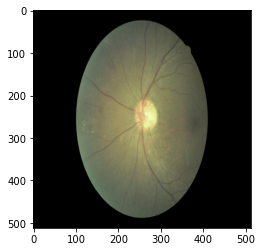

In [24]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [25]:
test_image=image.img_to_array(test_image)

In [26]:
test_image=np.expand_dims(test_image,axis=0)

In [27]:
result=model.predict(test_image)

In [28]:
result

array([[1., 0.]], dtype=float32)

In [29]:
prediction = result[0]

In [30]:
classes=training_set.class_indices

In [31]:
classes

{'No_DR': 0, 'Severe': 1}

In [32]:
prediction=list(prediction)

In [33]:
prediction

[1.0, 0.0]

In [34]:
classes=['No_DR','Severe']

In [35]:
output=zip(classes,prediction)

In [36]:
output=dict(output)

In [37]:
output

{'No_DR': 1.0, 'Severe': 0.0}

In [38]:
if output['No_DR']==1.0 :
    print('No_DR')
elif output['Severe']==1.0:
    print("Severe")

No_DR
